In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
#read json
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
transcript.head()

,person,event,value,time,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [6]:
#one hot encode channels
mlb = MultiLabelBinarizer()

channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [7]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [8]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [9]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [10]:
transcript.head()

,person,event,value,time,offer id,amount,offer_id,reward_x,reward_y,channels,difficulty,duration,offer_type,id,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#check completed offers which are identified as having non-null offer_ids
offers_completed=transcript[transcript['offer_id'].notnull()]

In [12]:
#Check channels associated with the most completed offers
channel_distribution=transcript[['email','mobile','social','web']].sum().sort_values(ascending=False)
channel_distribution=pd.DataFrame(channel_distribution).reset_index()

In [13]:
channel_distribution.columns =['channels','count of completed offers']
channel_distribution['percentage']=(channel_distribution['count of completed offers']/offers_completed['offer_id'].count()*100).astype(int)

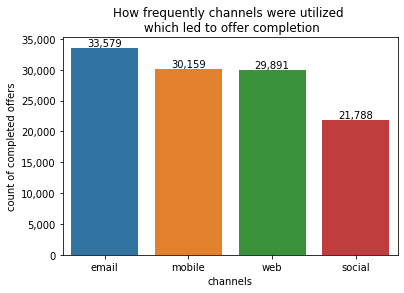

In [14]:
ax=sns.barplot(data=channel_distribution, x="channels", y="count of completed offers")
plt.title('How frequently channels were utilized \n which led to offer completion')
ax.bar_label(ax.containers[0],fmt='{:,.0f}')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

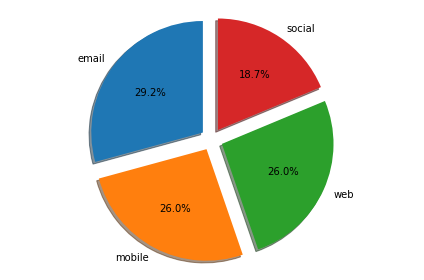

In [15]:
# Pie chart
labels = channel_distribution['channels'].tolist()
sizes = channel_distribution['percentage'].tolist()
# explode separates the pie slices
explode = (0.1, 0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#Relative to each other, email channel strategy is utilized most in completing reward offers, 
#followed by mobile & web, and finally social channels.

#I'm curious if there is messaging fatigue by deploying multiple channel strategy
#depending on the cadence of these offers.

In [16]:
#what's the demographic of those who respond to offers?
offers_completed=offers_completed.merge(profile, left_on='person', right_on='id', how='left')

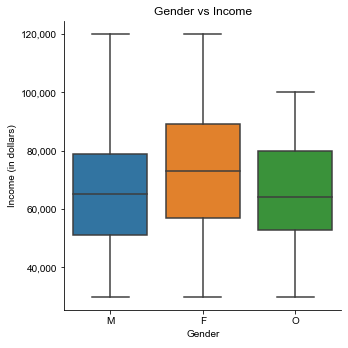

In [17]:
#Gender vs Income distribution - Boxplot
fg=sns.catplot(data=offers_completed,x='gender',y='income',kind='box')
sns.set()
for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel("Income (in dollars)")

plt.tight_layout()
plt.show()

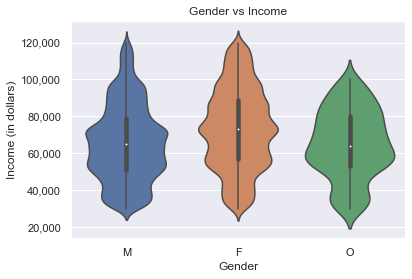

In [18]:
#Gender vs Income distribution - Violin Plot
ax=sns.violinplot(data=offers_completed, x="gender", y="income")
sns.set()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel("Income (in dollars)")
plt.show()

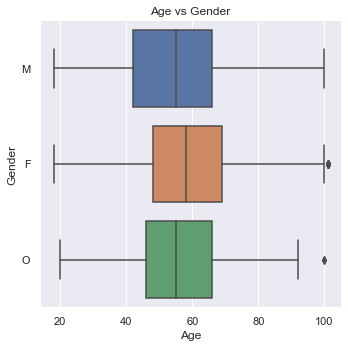

In [19]:
#Age vs Gender distribution - Box Plot
fg=sns.catplot(data=offers_completed,x='age',y='gender',kind='box')
sns.set()
plt.title('Age vs Gender')
plt.xlabel('Age')
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

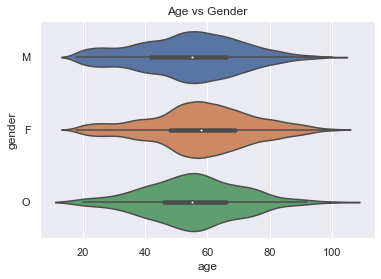

In [20]:
#Age vs Gender distribution - Violin Plot

sns.violinplot(data=offers_completed, x="age", y="gender")
plt.title('Age vs Gender')
plt.show()

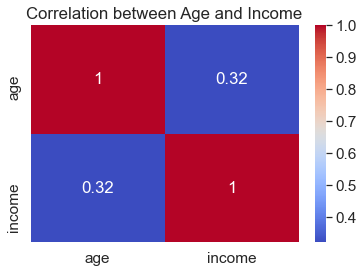

In [21]:
#Correlation of Age and Income using heatmap
numerical=['age','income']
plt.figure(figsize = (6,4))
cormap = offers_completed[numerical].corr()
cormap=round(cormap,2)
sns.set(font_scale=1.4)
sns.heatmap(cormap, cmap='coolwarm', annot=True)
plt.title('Correlation between Age and Income')
plt.show()
#Age and income are positively correlated at .32 because as you get older, you tend to generate more income.